**Import library dan module yang dibutuhkan**

---
Mengimpor library dan module yang dibutuhkan untuk membuat project ini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

from google.colab import drive
from google.colab import data_table
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

**Install library Kaggle**

---

Menginstal library tambahan yang dibutuhkan. Dalam hal ini, library Kaggle yang nantinya akan digunakann untuk load dataset dari situs Kaggle

In [2]:
#install library dari luar
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Mount Google Drive Ke Dalam Google Colab**

---
Memberikan izin akses Google Colab untuk menggunakan Google Drive pribadi. Agar dataset yang telah di download dari situs Kaggle tidak hilang saat session timeout, maka dataset tersebut akan disimpan pada Google Drive pribadi.


In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Pengatur Path Penyimpanan Dataset**

---
Mengatur path (direktori/folder) yang akan digunakan dalam penyimpanan dataset.

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Dataset'
%cd /content/gdrive/MyDrive/Dataset

/content/gdrive/MyDrive/Dataset


**Download Dataset**

---
Download dataset dari situs Kaggle untuk digunakan dalam project ini


In [ ]:
!kaggle datasets download -d shubhambathwal/flight-price-prediction

  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 56.9MB/s]


**Ekstrak Dataset**

---
Ekstrak dataset yang masih dalam file .zip


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  flight-price-prediction.zip
  inflating: Clean_Dataset.csv       
  inflating: business.csv            
  inflating: economy.csv             


**Load Dataset dan Proses Cleaning Awal**

---
Dataset yang telah tersedia di Google Drive kemudian di load. Setelah mengamati beberapa kolom yang terdapat dalam dataset. Ada dua kolom yang dapat langsung dieliminasi, karena tidak relevan dengan proses analisis data.


In [46]:
flight = pd.read_csv('/content/gdrive/MyDrive/Dataset/Clean_Dataset.csv')
flight.drop(['Unnamed: 0', 'flight'], axis = 1, inplace = True)
flight

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


**Deskripsi kolom yang terdapat dalam dataset**

---
- airline = Nama maskapai penerbangan.
- source_city = Kota awal pemberangkatan.
- departure_time = Waktu pemberangkatan.
- stops = jumlah transit selama perjalanan.
- arrival_time = Waktu tiba di kota tujuan.
- destination_city = Kota tujuan penerbangan.
- class = Kelas penerbangan.
- duration = Waktu yang dibutuhkan untuk tiba di kota tujuan.
- days_left = Jarak hari pemesanan tiket dengan hari penerbangan.
- price = harga tiket.

**Memeriksa Missing Value**

---
Memeriksa dataset untuk mengetahui apakah dataset memiliki missing value. Berdasarkan hasil analisis, tidak terdapat missing value.

In [6]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


**Mengubah satuan nilai dalam kolom duration**

---
Mengubah satuan nilai dalam kolom duration dari jam ke menit

In [47]:
flight['duration'] = flight['duration'].apply(lambda x: int(round(x*60)))
flight

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,130,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,140,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,130,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,135,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,140,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,605,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,625,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,830,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,600,49,81585


**Menampilkan statistik data**

---
Menampilkan jumlah data, rataan, standar deviasi, nilai minimum, quartil 1, quartil 2, quartil 3 dan nilai maksimum yang terdapat dalam dataset.


In [ ]:
data_table.enable_dataframe_formatter()
flight.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,733.259055,26.004751,20889.660523
std,431.518381,13.561004,22697.767366
min,50.000000,1.000000,1105.000000
25%,410.000000,15.000000,4783.000000
50%,675.000000,26.000000,7425.000000
75%,970.000000,38.000000,42521.000000
max,2990.000000,49.000000,123071.000000


**Menganalisis outliers pada variabel duration**

---
Mencari dan menghapus outlier pada variabel duration.


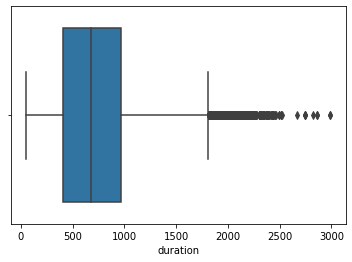

In [ ]:
# Mencari Outlier Pada Variabel duration
sns.boxplot(x=flight['duration'])

**Menganalisis outliers pada variabel days_left**

---
Mencari dan menghapus outlier pada variabel days_left.


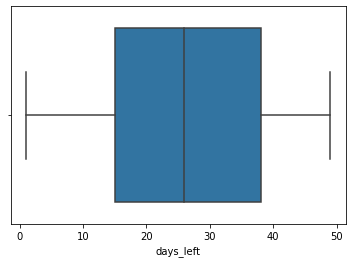

In [ ]:
# Mencari Outlier pada variabel days_left
sns.boxplot(x=flight['days_left'])

**Mengeliminasi outliers dengan metode IQR**

---
Mengeliminasi outliers dengan Metode IQR, sehingga data outliers hilang.


In [48]:
# Hapus Outlier dengan IQR
Q1 = flight.quantile(0.25)
Q3 = flight.quantile(0.75)

IQR = Q3-Q1
flight = flight[~((flight<(Q1-1.5*IQR)) | (flight>(Q3+1.5*IQR))).any(axis=1)]

flight.shape

<ipython-input-48-b103834bce8e>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  flight = flight[~((flight<(Q1-1.5*IQR)) | (flight>(Q3+1.5*IQR))).any(axis=1)]


(297920, 10)

**Encoder untuk kolom (variabel) stops**

---
Untuk memudahkan analisis data, variabel stops diubah dari kategorikal menjadi numerical

In [49]:
# Label Encoder Untuk Variabel stops
def encoder(x):
  if(x=='zero'):
    return 0
  elif(x=='one'):
    return 1
  else:
    return 2

flight['stops'] = flight['stops'].apply(encoder)
flight[['stops']]

<ipython-input-49-ef40e37aa916>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight['stops'] = flight['stops'].apply(encoder)


,stops
0,0
1,0
2,0
3,0
4,0
...,...
300148,1
300149,1
300150,1
300151,1


**Mengelompokkan Data Kategorikal dan Numerikal**

---
Mengelompokkan data ke dalam dua kategori, yaitu categorical_feature dan numerical_feature

In [10]:
categorical_feature = ['airline', 'source_city', 'departure_time',
                       'arrival_time', 'destination_city', 'class']
numerical_feature = ['duration', 'days_left', 'price', 'stops']

**Visualisasi Variabel airline**

---
Memvisualisasikan sebaran data variabel airline dengan menggunakan diagram batang.


           jumlah sampel  persentase
Vistara           126917        42.6
Air_India          79601        26.7
Indigo             43120        14.5
GO_FIRST           23173         7.8
AirAsia            16098         5.4
SpiceJet            9011         3.0


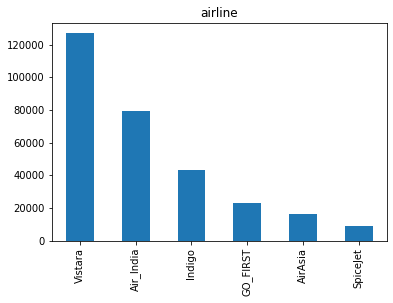

In [ ]:
feature = categorical_feature[0]
count = flight[feature].value_counts()
percent = 100*flight[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Visualisasi variabel source_city**

---
Memvisualisasikan sebaran data variabel source_city dengan menggunakan diagram batang.

           jumlah sampel  persentase
Delhi              61156        20.5
Mumbai             60683        20.4
Bangalore          51548        17.3
Kolkata            45841        15.4
Hyderabad          40636        13.6
Chennai            38056        12.8


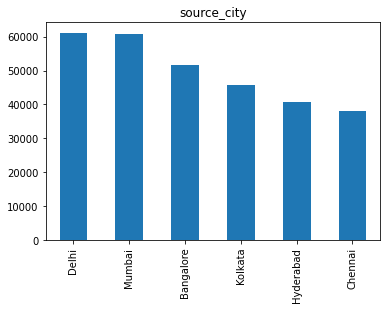

In [ ]:
feature = categorical_feature[1]
count = flight[feature].value_counts()
percent = 100*flight[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Visualisasi variabel departure_time**

---
Memvisualisasikan sebaran data variabel departure_time dengan menggunakan diagram batang.


               jumlah sampel  persentase
Morning                70372        23.6
Early_Morning          66189        22.2
Evening                64955        21.8
Night                  47998        16.1
Afternoon              47100        15.8
Late_Night              1306         0.4


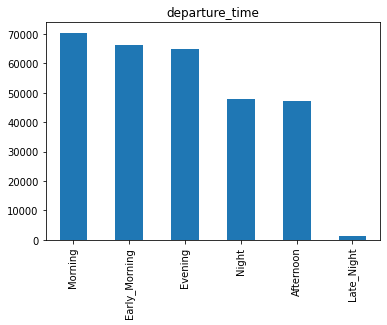

In [ ]:
feature = categorical_feature[2]
count = flight[feature].value_counts()
percent = 100*flight[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Visualisasi variabel arrival_time**

---
Memvisualisasikan sebaran data variabel arrival_time dengan menggunakan diagram batang.

               jumlah sampel  persentase
Night                  90702        30.4
Evening                77217        25.9
Morning                62708        21.0
Afternoon              37938        12.7
Early_Morning          15367         5.2
Late_Night             13988         4.7


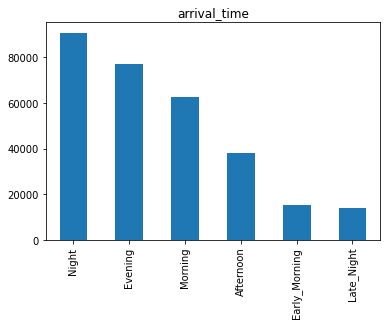

In [ ]:
feature = categorical_feature[3]
count = flight[feature].value_counts()
percent = 100*flight[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Visualisasi variabel destination_city**

---
Memvisualisasikan sebaran data variabel destination_city dengan menggunakan diagram batang.


           jumlah sampel  persentase
Mumbai             58656        19.7
Delhi              57141        19.2
Bangalore          50686        17.0
Kolkata            49138        16.5
Hyderabad          42329        14.2
Chennai            39970        13.4


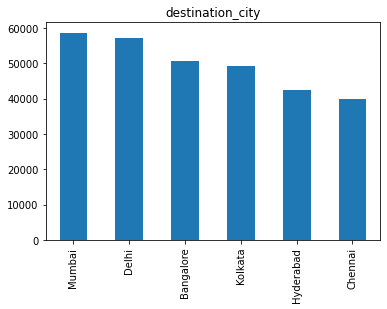

In [ ]:
feature = categorical_feature[4]
count = flight[feature].value_counts()
percent = 100*flight[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Visualisasi variabel class**

---
Memvisualisasikan sebaran data variabel clas dengan menggunakan diagram batang.

          jumlah sampel  persentase
Economy          204792        68.7
Business          93128        31.3


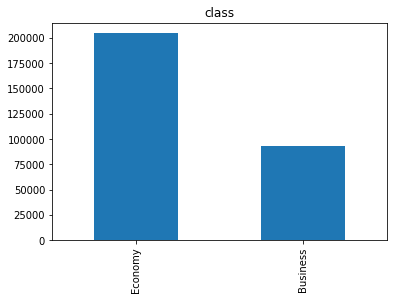

In [ ]:
feature = categorical_feature[5]
count = flight[feature].value_counts()
percent = 100*flight[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Membuat histogram untuk data numerik**

---
Membuat histogram untuk seluruh data numerik


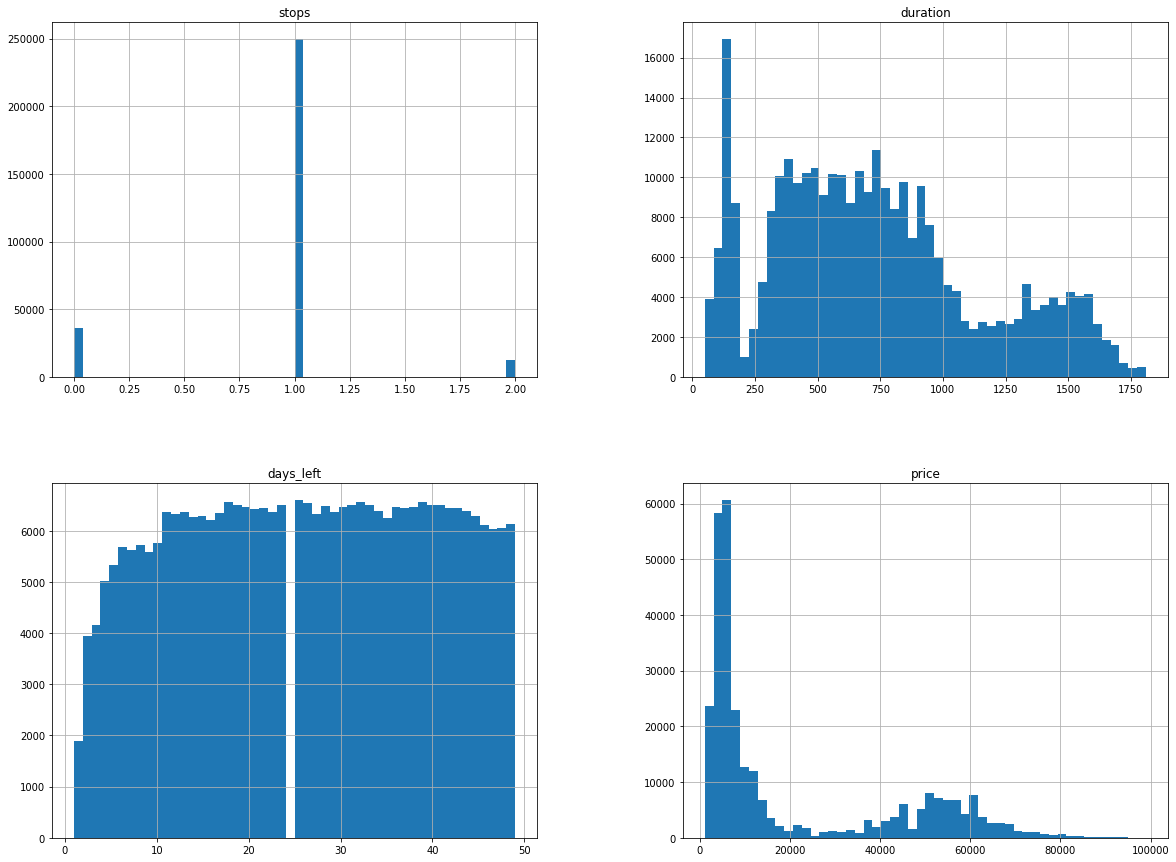

In [ ]:
flight.hist(bins=50, figsize=(20,15))
plt.show()

**Visualisasi variabel secara multivariative**

---
Memvisualisasikan variabel dengan menggunakan analisis multivariative


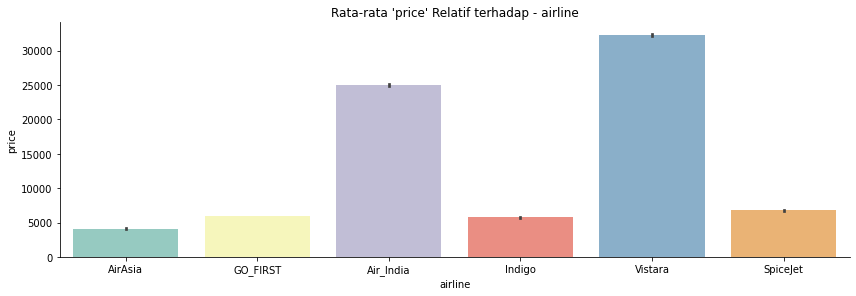

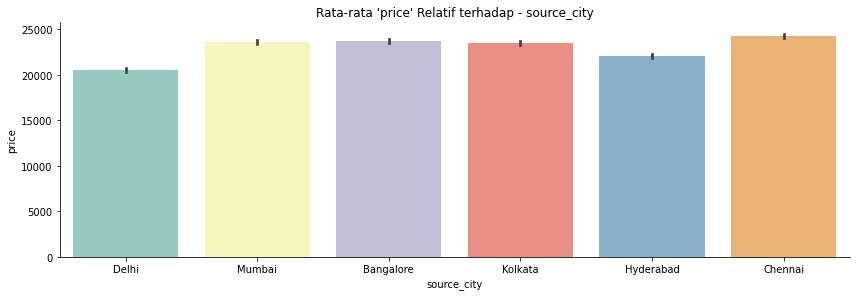

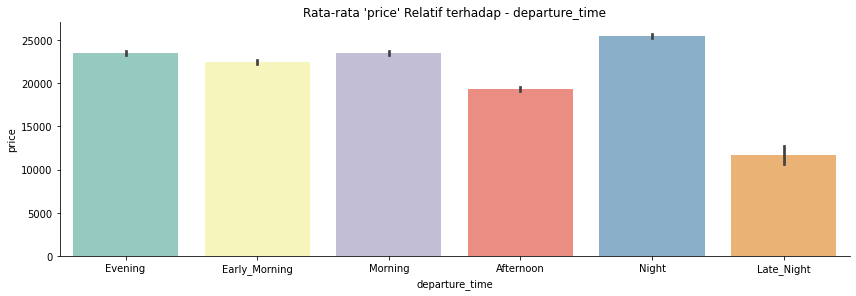

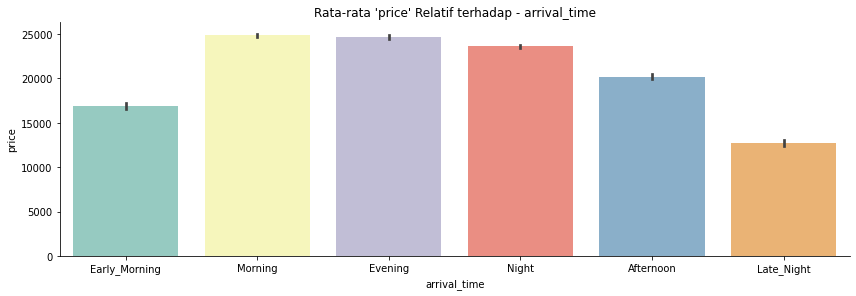

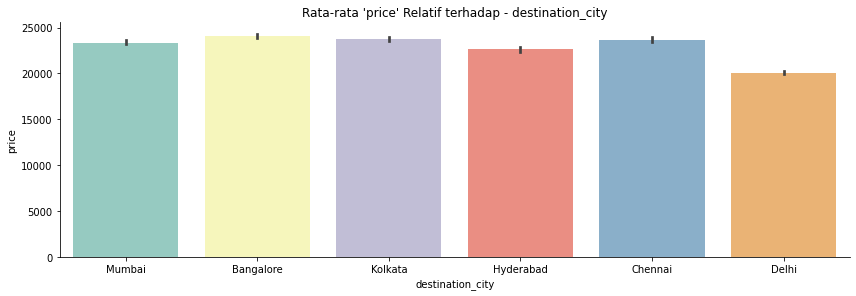

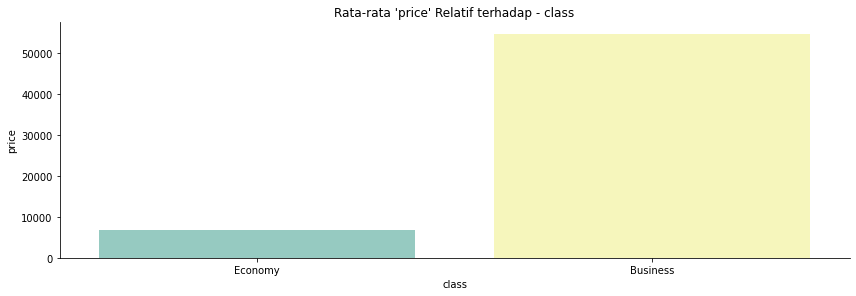

In [ ]:
cat_features = flight.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,
              data=flight, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

**Analisis Multivariative Pada Variabel Numerikal**

---
Analisis Multivariative Pada Variabel Numerikal

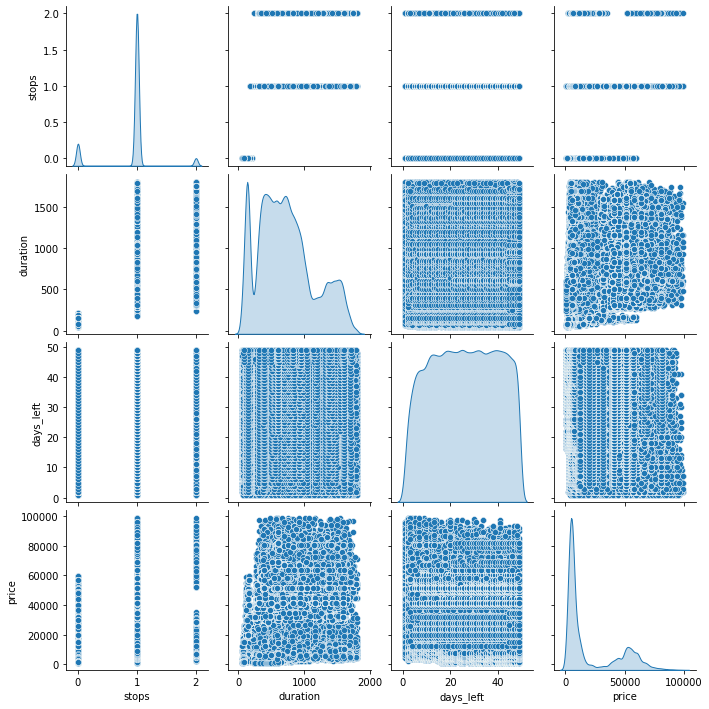

In [ ]:
sns.pairplot(flight, diag_kind = 'kde')

**Membuat correlation matrix**

---
Membuat correlation matrix untuk mengetahui korelasi data

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

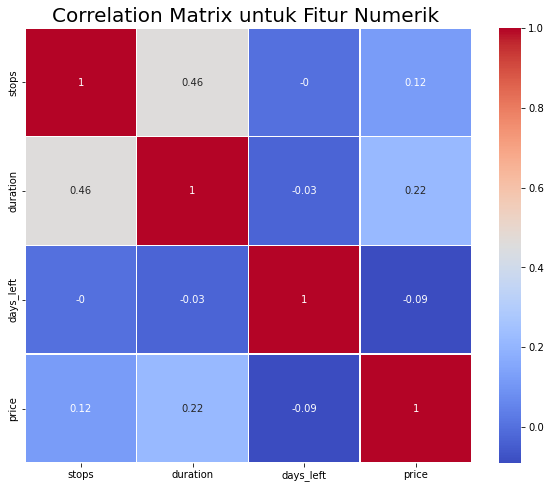

In [50]:
plt.figure(figsize=(10, 8))
correlation_matrix = flight.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

**Data Preprocessing Lanjutan**

---
Melakukan data preprocessing lanjutan, dengan cara drop kolom/variabel days_left (karena tidak relevan)


In [51]:
flight.drop(['days_left'], axis=1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Menampilkan update data**

---
Menampilkan update terbaru setelah dihilangkan variabel days_left


In [ ]:
flight

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,130,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,140,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,130,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,135,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,140,5955
...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,Business,605,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,Business,625,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,Business,830,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,Business,600,81585


**Melakukan one hot encoding**

---
Melakukan one hot encoding pada seluruh data kategorikal

In [52]:
from sklearn.preprocessing import  OneHotEncoder
flight = pd.concat([flight, pd.get_dummies(flight['airline'], prefix='airline')],axis=1)
flight = pd.concat([flight, pd.get_dummies(flight['departure_time'], prefix='departure_time')],axis=1)
flight = pd.concat([flight, pd.get_dummies(flight['arrival_time'], prefix='arrival_time')],axis=1)
flight = pd.concat([flight, pd.get_dummies(flight['class'], prefix='class')],axis=1)
flight = pd.concat([flight, pd.get_dummies(flight['source_city'], prefix='class')],axis=1)
flight = pd.concat([flight, pd.get_dummies(flight['destination_city'], prefix='class')],axis=1)
flight.drop(['airline','departure_time', 'arrival_time','class', 'source_city', 'destination_city'],
            axis=1, inplace=True)

**Cek data setelah one hot encoding**

---
Cek data setelah one hot encoding

In [ ]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297920 entries, 0 to 300152
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   stops                         297920 non-null  int64
 1   duration                      297920 non-null  int64
 2   price                         297920 non-null  int64
 3   airline_AirAsia               297920 non-null  uint8
 4   airline_Air_India             297920 non-null  uint8
 5   airline_GO_FIRST              297920 non-null  uint8
 6   airline_Indigo                297920 non-null  uint8
 7   airline_SpiceJet              297920 non-null  uint8
 8   airline_Vistara               297920 non-null  uint8
 9   departure_time_Afternoon      297920 non-null  uint8
 10  departure_time_Early_Morning  297920 non-null  uint8
 11  departure_time_Evening        297920 non-null  uint8
 12  departure_time_Late_Night     297920 non-null  uint8
 13  departure_time

**Split Data**

---

Split data menjadi data latih (training data) dan data uji (test data)

In [53]:
X = flight.drop(['price'],axis= 1)
y = flight['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

**Normalisasi data X_train**

---

Normalisasi data X_train

In [54]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['duration', 'stops']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,duration,stops
284631,0.012273,0.20057
172903,-0.666526,0.20057
127078,-0.714161,0.20057
199424,1.643773,0.20057
1076,-0.868975,0.20057


**Normalisasi data X_test**

---

Normalisasi data X_test

In [55]:
scaler = StandardScaler()
scaler.fit(X_test[numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_test[numerical_features].head()

,duration,stops
21124,0.878524,0.197987
113342,-0.446818,0.197987
236844,-0.028917,0.197987
274642,1.917305,0.197987
974,0.460623,0.197987


In [16]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 297920
Total # of sample in train dataset: 238336
Total # of sample in test dataset: 59584


**Membuat dataframe untuk menampung nilai mean absolute error hasil pelatihan model**

---
Membuat dataframe untuk menampung nilai mean absolute error hasil pelatihan model

In [56]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mae', 'test_mae'], 
                      columns=['RandomForest', 'Boosting'])

**Melatih model dengan menggunakan Random Forest**

---
Melatih model dengan menggunakan Random Forest

In [44]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=100, max_depth=64, max_features='sqrt', 
                           random_state=1, n_jobs=-1, verbose = 2, warm_start = True)
RF.fit(X_train, y_train)
 
models.loc['train_mae','RandomForest'] = mean_absolute_error(y_pred=RF.predict(X_train), y_true=y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.0s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.0s finished


**Melatih model dengan menggunakan Boosting Algorithm**

---
Melatih model dengan menggunakan Boosting Algorithm

In [38]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(n_estimators = 100, learning_rate=1.0, random_state=1)                             
boosting.fit(X_train, y_train)
models.loc['train_mae','Boosting'] = mean_absolute_error(y_pred=boosting.predict(X_train), y_true=y_train)

**Evaluasi Hasil training**

---
Melakukan evaluasi hasil training dengan melihat hasil Mean Absolute Error.


In [45]:
# Buat variabel mae yang isinya adalah dataframe nilai mae data train dan test pada masing-masing algoritma
mae = pd.DataFrame(columns=['train', 'test'], index=['RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Absolute Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mae.loc[name, 'train'] = mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train))
    mae.loc[name, 'test'] = mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test))
 
# Panggil mae
mae

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


,train,test
RF,2009.858278,2218.153604
Boosting,4818.380262,4790.128881


**Visualisasi Mean Absolute Error**

---
Visualisasi Mean Absolute Error dengan menggunakan diagram

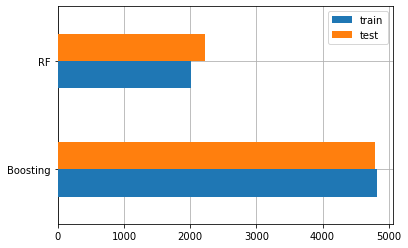

In [43]:
fig, ax = plt.subplots()
mae.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

**Tes Nilai Hasil Prediksi Dibandingkan Nilai Sebenarnya**

---
Visualisasi Mean Absolute Error dengan menggunakan diagram

In [22]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished


,y_true,prediksi_RF,prediksi_Boosting
21124,14880,9053.7,9057.4
113342,5780,8387.4,9057.4
236844,36980,38782.2,49611.0
274642,55502,56810.5,63275.8
974,5955,5415.6,9057.4
276071,51875,53887.3,63275.8
272514,49151,48052.9,49611.0
216807,42212,42764.3,49611.0
24896,7410,7887.8,9057.4
127243,4439,6261.6,8147.4


**Menghitung 10% MAE**

---Menghitung 10% MAE untuk mengetahui keandalan model yang dibuat

In [ ]:
#Menghitung 10% Nilai Mean Absolute Error (MAE)
mae_target = (flight['price'].max() - flight['price'].min()) * 10/100
print(mae_target)

9786.7


**Kesimpulan**
Nilai MAE yang dihasilkan oleh Random Forest pada saat training dan testing kurang dari 10%, sehingga model sudah dapat dikatakan baik (good fit).